#Installing Prerequisite Modules namely `MNE`, `SCoT`, `statsmodels`, `mne-connectivity`

In [ ]:
!pip install mne

In [ ]:
!pip install mne-connectivity

In [ ]:
pip install --upgrade tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [ ]:
pip install scikeras


In [ ]:
!pip install scot

In [ ]:
!pip install statsmodels

#Importing modules

In [ ]:
from glob import glob
import os
from pathlib import Path
%matplotlib inline
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import periodogram
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
from scot.connectivity import connectivity
from sklearn.preprocessing import StandardScaler



#Function that applies the `VAR` Model to the transposed data (using `statsmodels` to estimate VAR Coefficients)

In [ ]:
def calculate_VAR_coefficients(data):

    X = transposed_data
    model = VAR(X)
    results = model.fit(maxlags=10)

    var_coefficients = results.params
    var_coefficients_transposed = var_coefficients.T

    return var_coefficients_transposed

#Using `Connectivity` class from `SCoT` to calculate PDC Matrices

`scot.connectivity.connectivity(measure_names, b, c=None, nfft=512)`

Calculate connectivity measures.

**Parameters:**
`measure_names` (str or list of str):
Name(s) of the connectivity measure(s) to calculate. See Connectivity for supported measures.

`b` array, shape `(n_channels, n_channels * model_order)`
VAR model coefficients: See On the arrangement of VAR model coefficients for details about the arrangement of coefficients.

`c` array, shape `(n_channels, n_channels)`, *optional*:
Covariance matrix of the driving noise process. Identity matrix is used if set to None (default).

`nfft` int, *optional*:
Number of frequency bins to calculate. Note that these points cover the range between 0 and half the sampling rate.

**Returns:**
`result` array, shape `(n_channels, n_channels, nfft)`:
An array of shape (m, m, nfft) is returned if measures is a string. If measures is a list of strings, a dictionary is returned, where each key is the name of the measure, and the corresponding values are arrays of shape (m, m, nfft).

In [ ]:
def calculate_PDC_matrices(coefficients):

   # Padding the data with 0s to adjust the dimensions
    # Desired shape with second dimension as an integer multiple of the first dimension
    desired_shape = (6, 66)

    # Pad the data to achieve the desired shape
    padded_data = np.pad(coefficients, ((0, 0), (0, desired_shape[1] - coefficients.shape[1])), mode='constant', constant_values=0)



    # VAR Coefficients
    var_coefficients = padded_data
    nfft = 128

    measure_name = 'PDC'
    # Initialize the Connectivity class
    connectivity_obj = connectivity(measure_names=measure_name, b=var_coefficients, nfft=nfft)


    return connectivity_obj

#Loading the entire preprocessed dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to the folder containing EEG files for Healthy Controls (HCs)
hc_folder = "/content/drive/MyDrive/Colab Notebooks/HCs"

# Path to the folder containing EEG files for MDD patients
mdd_folder = "/content/drive/MyDrive/Colab Notebooks/MDD"

# List to store features
all_features = []

# List to store labels
all_labels = []

#Loading EEG files from the directory

Calling the `calculate_VAR_coefficients` and `calculate_PDC_matrices` functions defined above and storing the connectivity matrices into `all_features` array.

Lables are stored in all_labels array. `0` is assigned to Healthy Controls (HCs) and `1` is assigned to MDD patients.  

In [ ]:
# Loop through each Healthy Controls EEG file
for filename in os.listdir(hc_folder):
    if filename.endswith(".edf"):
        filepath = os.path.join(hc_folder, filename)

        # Load EEG data using MNE
        raw = mne.io.read_raw_edf(filepath)

        channels_to_remove = ['Fp1',
                      'C3',
                      'O1',
                      'F7',
                      'T3',
                      'T5',
                      'Fp2',
                      'C4',
                      'O2',
                      'F8',
                      'T4',
                      'T6',
                      'Cz',
                      ]
        raw.drop_channels(channels_to_remove)
        data = raw.get_data()
        transposed_data = data.T

        # Calculate VAR coefficients
        coefficients = calculate_VAR_coefficients(transposed_data)

        # Calculate PDC matrices
        pdc_matrices = calculate_PDC_matrices(coefficients)

        # Append features to the list
        all_features.append(pdc_matrices)

        # Append label (1 for Healthy Controls)
        all_labels.append(1)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/HCs/Copy of H S2 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/HCs/Copy of H S6 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/HCs/Copy of H S1 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/HCs/Copy of H S5 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/HCs/Copy of H S3 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /con

In [ ]:
# Loop through each Healthy Controls EEG file
for filename in os.listdir(mdd_folder):
    if filename.endswith(".edf"):
        filepath = os.path.join(mdd_folder, filename)

        # Load EEG data using MNE
        raw = mne.io.read_raw_edf(filepath)

        channels_to_remove = ['Fp1',
                      'C3',
                      'O1',
                      'F7',
                      'T3',
                      'T5',
                      'Fp2',
                      'C4',
                      'O2',
                      'F8',
                      'T4',
                      'T6',
                      'Cz',
                      ]
        raw.drop_channels(channels_to_remove)
        data = raw.get_data()
        transposed_data = data.T

        # Calculate VAR coefficients
        coefficients = calculate_VAR_coefficients(transposed_data)

        # Calculate PDC matrices
        pdc_matrices = calculate_PDC_matrices(coefficients)

        # Append features to the list
        all_features.append(pdc_matrices)

        # Append label (1 for Healthy Controls)
        all_labels.append(0)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/MDD/Copy of MDD S1 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/MDD/Copy of MDD S2 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/MDD/Copy of MDD S5 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/MDD/Copy of MDD S7 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/MDD/Copy of MDD S11 EC_preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameter

In [ ]:
# Convert features and labels to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)


In [ ]:
print(all_features.shape)  #(no. of subjects, n_channels, n_channels, nfft)

(59, 6, 6, 128)


In [ ]:
import numpy as np

# Reshape the data into 2D array where each row represents a subject's flattened PDC matrix
n_subjects, n_channels, _, nfft = all_features.shape
pdc_matrices_2d = all_features.reshape(n_subjects, -1)  # Flatten each PDC matrix


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
pdc_matrices_scaled = scaler.fit_transform(pdc_matrices_2d)


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
n_components = 50  # Specify the number of principal components to retain
pca = PCA(n_components=n_components)

# Fit PCA to the standardized data
pca.fit(pdc_matrices_scaled)

# Transform the data into the principal component space
pdc_matrices_pca = pca.transform(pdc_matrices_scaled)


In [ ]:
# Explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of Each Component:")
print(explained_variance_ratio)

# Total variance explained by selected components
total_variance_explained = np.sum(explained_variance_ratio)
print("Total Variance Explained by Selected Components:", total_variance_explained)


Explained Variance Ratio of Each Component:
[0.25654363 0.11304021 0.08015366 0.06519637 0.0462814  0.03842647
 0.03123584 0.02554543 0.02314189 0.02044813 0.01914391 0.01791459
 0.01474749 0.01435953 0.01414372 0.01262699 0.01169075 0.010867
 0.0105548  0.01023288 0.00904042 0.00853992 0.00790324 0.00785232
 0.00753434 0.00724804 0.00702319 0.00675886 0.00653623 0.00620695
 0.00593674 0.00560806 0.00536945 0.00517174 0.004902   0.00464879
 0.00445729 0.00419327 0.00412964 0.00377885 0.00356117 0.00352938
 0.00332227 0.00320072 0.00314387 0.00272993 0.00260413 0.00247718
 0.00239319 0.00224838]
Total Variance Explained by Selected Components: 0.9883442309700041


In [ ]:
import numpy as np

# Assuming pca_transformed_pdc is your PCA-transformed PDC data
print("Shape of PCA-transformed PDC data:", pdc_matrices_pca.shape)


Shape of PCA-transformed PDC data: (59, 50)


In [ ]:
# import numpy as np

# n_samples, n_components = pdc_matrices_pca.shape

# # Reshape PCA-transformed data for CNN input
# X_cnn = pdc_matrices_pca.reshape(n_samples, n_components, 1, 1)


In [ ]:
# from tensorflow.keras import models, layers

# # Assuming n_components corresponds to the number of principal components
# n_components = pdc_matrices_pca.shape[1]

# # Define CNN model for 2D input data
# model = models.Sequential([
#     layers.Input(shape=(n_components,)),  # Input shape corresponding to 2D data
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Display model summary
# model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               6528      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14849 (58.00 KB)
Trainable params: 14849 (58.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import models, layers


# Define and compile the model with regularization and dropout
model = models.Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(50,)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your data stored in pca_transformed_pdc and labels variables
X = pdc_matrices_pca  # Input features (PCA-transformed PDC data)
y = all_labels  # Corresponding labels (e.g., binary classification labels)

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (37, 50) (37,)
Validation set shape: (10, 50) (10,)
Test set shape: (12, 50) (12,)


In [ ]:
# Train the model using the training and validation data
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/30
2/2 [==============================] - 2s 191ms/step - loss: 3.4868 - accuracy: 0.5946 - val_loss: 2.1142 - val_accuracy: 0.6000
Epoch 2/30
2/2 [==============================] - 0s 30ms/step - loss: 3.2999 - accuracy: 0.4865 - val_loss: 1.3397 - val_accuracy: 0.7000
Epoch 3/30
2/2 [==============================] - 0s 30ms/step - loss: 1.3387 - accuracy: 0.6757 - val_loss: 1.0050 - val_accuracy: 0.7000
Epoch 4/30
2/2 [==============================] - 0s 32ms/step - loss: 2.2365 - accuracy: 0.5676 - val_loss: 0.9139 - val_accuracy: 0.8000
Epoch 5/30
2/2 [==============================] - 0s 29ms/step - loss: 0.8044 - accuracy: 0.7297 - val_loss: 0.9411 - val_accuracy: 0.7000
Epoch 6/30
2/2 [==============================] - 0s 29ms/step - loss: 1.3330 - accuracy: 0.6757 - val_loss: 0.9780 - val_accuracy: 0.7000
Epoch 7/30
2/2 [==============================] - 0s 34ms/step - loss: 1.8045 - accuracy: 0.5946 - val_loss: 0.9962 - val_accuracy: 0.8000
Epoch 8/30
2/2 [==========

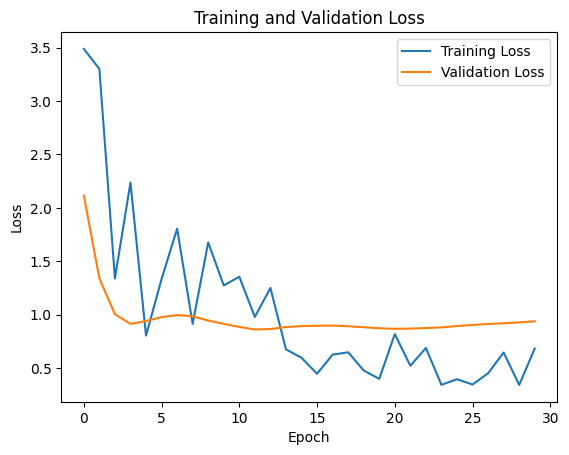

In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 35ms/step - loss: 0.7306 - accuracy: 0.8333
Test Loss: 0.7306084632873535
Test Accuracy: 0.8333333134651184


In [ ]:
# Saving trained Keras model
model.save('my_trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

# Assuming 'history' is your training history object from model.fit()
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [ ]:
from scikeras.wrappers import KerasClassifier

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Define a function to create the feedforward neural network model
def create_model(dropout_rate=0.3):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(pdc_matrices_pca.shape[1],)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create a KerasClassifier based on the create_model function
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=32, verbose=2)


In [ ]:
# Define the grid of hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [30, 50, 100],
    'batch_size': [32, 64, 128]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pdc_matrices_pca, all_labels, test_size=0.2, random_state=42)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1/1 - 7s - 7s/step - accuracy: 0.3548 - loss: 3.9272
Epoch 2/30
1/1 - 0s - 24ms/step - accuracy: 0.5161 - loss: 1.8650
Epoch 3/30
1/1 - 0s - 58ms/step - accuracy: 0.6129 - loss: 1.7040
Epoch 4/30
1/1 - 0s - 23ms/step - accuracy: 0.5806 - loss: 1.4988
Epoch 5/30
1/1 - 0s - 21ms/step - accuracy: 0.8065 - loss: 0.9576
Epoch 6/30
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 2.0378
Epoch 7/30
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.3049
Epoch 8/30
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.4897
Epoch 9/30
1/1 - 0s - 21ms/step - accuracy: 0.6452 - loss: 1.2950
Epoch 10/30
1/1 - 0s - 21ms/step - accuracy: 0.7097 - loss: 1.1144
Epoch 11/30
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.4117
Epoch 12/30
1/1 - 0s - 20ms/step - accuracy: 0.6774 - loss: 0.9564
Epoch 13/30
1/1 - 0s - 21ms/step - accuracy: 0.7742 - loss: 0.7337
Epoch 14/30
1/1 - 0s - 24ms/step - accuracy: 0.7419 - loss: 0.7817
Epoch 15/30
1/1 - 0s - 21ms/step - accuracy: 0.8387 - loss: 0.6305
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4839 - loss: 2.9424
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.5484 - loss: 3.1073
Epoch 3/30
1/1 - 0s - 57ms/step - accuracy: 0.5484 - loss: 2.7331
Epoch 4/30
1/1 - 0s - 21ms/step - accuracy: 0.5484 - loss: 1.4589
Epoch 5/30
1/1 - 0s - 58ms/step - accuracy: 0.6452 - loss: 0.7982
Epoch 6/30
1/1 - 0s - 58ms/step - accuracy: 0.4839 - loss: 1.8184
Epoch 7/30
1/1 - 0s - 59ms/step - accuracy: 0.5806 - loss: 2.0614
Epoch 8/30
1/1 - 0s - 57ms/step - accuracy: 0.4516 - loss: 2.5170
Epoch 9/30
1/1 - 0s - 21ms/step - accuracy: 0.5161 - loss: 1.0807
Epoch 10/30
1/1 - 0s - 21ms/step - accuracy: 0.7419 - loss: 0.7450
Epoch 11/30
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.3769
Epoch 12/30
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 1.0910
Epoch 13/30
1/1 - 0s - 21ms/step - accuracy: 0.7097 - loss: 1.1532
Epoch 14/30
1/1 - 0s - 21ms/step - accuracy: 0.7742 - loss: 0.7533
Epoch 15/30
1/1 - 0s - 58ms/step - accuracy: 0.8387 - loss: 0.6462
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5312 - loss: 2.9815
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.5938 - loss: 1.6644
Epoch 3/30
1/1 - 0s - 24ms/step - accuracy: 0.5312 - loss: 2.4146
Epoch 4/30
1/1 - 0s - 20ms/step - accuracy: 0.5938 - loss: 1.6586
Epoch 5/30
1/1 - 0s - 23ms/step - accuracy: 0.5938 - loss: 1.5222
Epoch 6/30
1/1 - 0s - 21ms/step - accuracy: 0.5000 - loss: 2.7963
Epoch 7/30
1/1 - 0s - 20ms/step - accuracy: 0.5938 - loss: 1.8621
Epoch 8/30
1/1 - 0s - 20ms/step - accuracy: 0.7188 - loss: 1.8097
Epoch 9/30
1/1 - 0s - 57ms/step - accuracy: 0.5938 - loss: 1.5702
Epoch 10/30
1/1 - 0s - 56ms/step - accuracy: 0.7500 - loss: 1.5531
Epoch 11/30
1/1 - 0s - 24ms/step - accuracy: 0.6250 - loss: 1.5311
Epoch 12/30
1/1 - 0s - 56ms/step - accuracy: 0.5938 - loss: 1.1607
Epoch 13/30
1/1 - 0s - 21ms/step - accuracy: 0.7500 - loss: 1.0527
Epoch 14/30
1/1 - 0s - 57ms/step - accuracy: 0.7188 - loss: 1.3997
Epoch 15/30
1/1 - 0s - 21ms/step - accuracy: 0.6562 - loss: 0.8560
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.4516 - loss: 2.7289
Epoch 2/30
1/1 - 0s - 24ms/step - accuracy: 0.4516 - loss: 1.8229
Epoch 3/30
1/1 - 0s - 22ms/step - accuracy: 0.5484 - loss: 2.2903
Epoch 4/30
1/1 - 0s - 21ms/step - accuracy: 0.4839 - loss: 1.6517
Epoch 5/30
1/1 - 0s - 58ms/step - accuracy: 0.6452 - loss: 1.4725
Epoch 6/30
1/1 - 0s - 21ms/step - accuracy: 0.5484 - loss: 1.8351
Epoch 7/30
1/1 - 0s - 21ms/step - accuracy: 0.5484 - loss: 1.2421
Epoch 8/30
1/1 - 0s - 59ms/step - accuracy: 0.6774 - loss: 1.5178
Epoch 9/30
1/1 - 0s - 31ms/step - accuracy: 0.5484 - loss: 1.5569
Epoch 10/30
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.0929
Epoch 11/30
1/1 - 0s - 58ms/step - accuracy: 0.6774 - loss: 1.1086
Epoch 12/30
1/1 - 0s - 23ms/step - accuracy: 0.8065 - loss: 0.8259
Epoch 13/30
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 0.8626
Epoch 14/30
1/1 - 0s - 27ms/step - accuracy: 0.7097 - loss: 0.9396
Epoch 15/30
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 0.8629
Epoch 16/30
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4194 - loss: 5.1181
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.5806 - loss: 3.2782
Epoch 3/30
1/1 - 0s - 30ms/step - accuracy: 0.4839 - loss: 2.4334
Epoch 4/30
1/1 - 0s - 28ms/step - accuracy: 0.6452 - loss: 2.4011
Epoch 5/30
1/1 - 0s - 24ms/step - accuracy: 0.6774 - loss: 1.9503
Epoch 6/30
1/1 - 0s - 22ms/step - accuracy: 0.5484 - loss: 2.2217
Epoch 7/30
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 2.2304
Epoch 8/30
1/1 - 0s - 22ms/step - accuracy: 0.4839 - loss: 1.9041
Epoch 9/30
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 1.6937
Epoch 10/30
1/1 - 0s - 24ms/step - accuracy: 0.7097 - loss: 0.9993
Epoch 11/30
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.4829
Epoch 12/30
1/1 - 0s - 21ms/step - accuracy: 0.6452 - loss: 1.3326
Epoch 13/30
1/1 - 0s - 24ms/step - accuracy: 0.8065 - loss: 0.7885
Epoch 14/30
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 0.8907
Epoch 15/30
1/1 - 0s - 22ms/step - accuracy: 0.8065 - loss: 0.6781
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.4375 - loss: 3.7564
Epoch 2/30
1/1 - 1s - 1s/step - accuracy: 0.5312 - loss: 2.9128
Epoch 3/30
1/1 - 0s - 22ms/step - accuracy: 0.3750 - loss: 3.5019
Epoch 4/30
1/1 - 0s - 58ms/step - accuracy: 0.5938 - loss: 1.9323
Epoch 5/30
1/1 - 0s - 21ms/step - accuracy: 0.5938 - loss: 1.9625
Epoch 6/30
1/1 - 0s - 20ms/step - accuracy: 0.6875 - loss: 1.7920
Epoch 7/30
1/1 - 0s - 20ms/step - accuracy: 0.5312 - loss: 2.5271
Epoch 8/30
1/1 - 0s - 20ms/step - accuracy: 0.7500 - loss: 1.4612
Epoch 9/30
1/1 - 0s - 19ms/step - accuracy: 0.5625 - loss: 1.6426
Epoch 10/30
1/1 - 0s - 21ms/step - accuracy: 0.6562 - loss: 1.9617
Epoch 11/30
1/1 - 0s - 20ms/step - accuracy: 0.5938 - loss: 1.4305
Epoch 12/30
1/1 - 0s - 57ms/step - accuracy: 0.6875 - loss: 1.3720
Epoch 13/30
1/1 - 0s - 21ms/step - accuracy: 0.8125 - loss: 0.6697
Epoch 14/30
1/1 - 0s - 58ms/step - accuracy: 0.8438 - loss: 0.9866
Epoch 15/30
1/1 - 0s - 20ms/step - accuracy: 0.8125 - loss: 0.4167
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.6129 - loss: 2.9573
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.4194 - loss: 1.8517
Epoch 3/50
1/1 - 0s - 37ms/step - accuracy: 0.4194 - loss: 2.8474
Epoch 4/50
1/1 - 0s - 31ms/step - accuracy: 0.8065 - loss: 0.8936
Epoch 5/50
1/1 - 0s - 62ms/step - accuracy: 0.4194 - loss: 1.9326
Epoch 6/50
1/1 - 0s - 56ms/step - accuracy: 0.6129 - loss: 1.5232
Epoch 7/50
1/1 - 0s - 56ms/step - accuracy: 0.5806 - loss: 1.3656
Epoch 8/50
1/1 - 0s - 61ms/step - accuracy: 0.6774 - loss: 2.0178
Epoch 9/50
1/1 - 0s - 33ms/step - accuracy: 0.5806 - loss: 1.4416
Epoch 10/50
1/1 - 0s - 57ms/step - accuracy: 0.6129 - loss: 1.8102
Epoch 11/50
1/1 - 0s - 31ms/step - accuracy: 0.7097 - loss: 0.8882
Epoch 12/50
1/1 - 0s - 59ms/step - accuracy: 0.5806 - loss: 1.2064
Epoch 13/50
1/1 - 0s - 37ms/step - accuracy: 0.7419 - loss: 0.6959
Epoch 14/50
1/1 - 0s - 29ms/step - accuracy: 0.8065 - loss: 0.8873
Epoch 15/50
1/1 - 0s - 61ms/step - accuracy: 0.7097 - loss: 0.6548
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.3871 - loss: 3.8747
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.3548 - loss: 2.6422
Epoch 3/50
1/1 - 0s - 25ms/step - accuracy: 0.5161 - loss: 2.4320
Epoch 4/50
1/1 - 0s - 24ms/step - accuracy: 0.5161 - loss: 2.7919
Epoch 5/50
1/1 - 0s - 24ms/step - accuracy: 0.5161 - loss: 2.9209
Epoch 6/50
1/1 - 0s - 23ms/step - accuracy: 0.3548 - loss: 3.1484
Epoch 7/50
1/1 - 0s - 22ms/step - accuracy: 0.5484 - loss: 1.5140
Epoch 8/50
1/1 - 0s - 22ms/step - accuracy: 0.4516 - loss: 2.4833
Epoch 9/50
1/1 - 0s - 23ms/step - accuracy: 0.4516 - loss: 2.3190
Epoch 10/50
1/1 - 0s - 24ms/step - accuracy: 0.6774 - loss: 1.2465
Epoch 11/50
1/1 - 0s - 21ms/step - accuracy: 0.5484 - loss: 2.2223
Epoch 12/50
1/1 - 0s - 21ms/step - accuracy: 0.8065 - loss: 1.1074
Epoch 13/50
1/1 - 0s - 21ms/step - accuracy: 0.7097 - loss: 1.1652
Epoch 14/50
1/1 - 0s - 58ms/step - accuracy: 0.6129 - loss: 1.1903
Epoch 15/50
1/1 - 0s - 24ms/step - accuracy: 0.7419 - loss: 0.9052
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.5625 - loss: 2.5276
Epoch 2/50
1/1 - 0s - 21ms/step - accuracy: 0.5312 - loss: 2.3152
Epoch 3/50
1/1 - 0s - 26ms/step - accuracy: 0.8125 - loss: 0.7171
Epoch 4/50
1/1 - 0s - 53ms/step - accuracy: 0.6562 - loss: 1.7419
Epoch 5/50
1/1 - 0s - 28ms/step - accuracy: 0.7500 - loss: 1.1307
Epoch 6/50
1/1 - 0s - 55ms/step - accuracy: 0.6562 - loss: 2.0668
Epoch 7/50
1/1 - 0s - 21ms/step - accuracy: 0.8438 - loss: 0.5353
Epoch 8/50
1/1 - 0s - 58ms/step - accuracy: 0.7500 - loss: 1.3193
Epoch 9/50
1/1 - 0s - 24ms/step - accuracy: 0.7500 - loss: 1.4234
Epoch 10/50
1/1 - 0s - 21ms/step - accuracy: 0.8750 - loss: 0.5756
Epoch 11/50
1/1 - 0s - 21ms/step - accuracy: 0.7500 - loss: 1.0690
Epoch 12/50
1/1 - 0s - 20ms/step - accuracy: 0.8438 - loss: 0.4200
Epoch 13/50
1/1 - 0s - 23ms/step - accuracy: 0.7500 - loss: 0.7988
Epoch 14/50
1/1 - 0s - 21ms/step - accuracy: 0.7500 - loss: 1.0504
Epoch 15/50
1/1 - 0s - 20ms/step - accuracy: 0.7500 - loss: 1.1356
Epoch 16/50
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4839 - loss: 7.3431
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.4516 - loss: 4.4090
Epoch 3/50
1/1 - 0s - 25ms/step - accuracy: 0.4194 - loss: 5.1626
Epoch 4/50
1/1 - 0s - 57ms/step - accuracy: 0.5484 - loss: 3.5270
Epoch 5/50
1/1 - 0s - 56ms/step - accuracy: 0.5161 - loss: 4.0415
Epoch 6/50
1/1 - 0s - 56ms/step - accuracy: 0.5806 - loss: 1.7982
Epoch 7/50
1/1 - 0s - 23ms/step - accuracy: 0.5806 - loss: 2.8421
Epoch 8/50
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 2.4071
Epoch 9/50
1/1 - 0s - 55ms/step - accuracy: 0.5806 - loss: 0.9710
Epoch 10/50
1/1 - 0s - 20ms/step - accuracy: 0.5161 - loss: 1.8458
Epoch 11/50
1/1 - 0s - 21ms/step - accuracy: 0.4839 - loss: 2.7809
Epoch 12/50
1/1 - 0s - 57ms/step - accuracy: 0.6129 - loss: 1.9152
Epoch 13/50
1/1 - 0s - 21ms/step - accuracy: 0.6452 - loss: 1.7103
Epoch 14/50
1/1 - 0s - 21ms/step - accuracy: 0.6129 - loss: 1.6860
Epoch 15/50
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 1.4542
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.5806 - loss: 2.8664
Epoch 2/50
1/1 - 0s - 24ms/step - accuracy: 0.6452 - loss: 3.3321
Epoch 3/50
1/1 - 0s - 23ms/step - accuracy: 0.7742 - loss: 1.5968
Epoch 4/50
1/1 - 0s - 55ms/step - accuracy: 0.6452 - loss: 1.7757
Epoch 5/50
1/1 - 0s - 21ms/step - accuracy: 0.5161 - loss: 1.9900
Epoch 6/50
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.2204
Epoch 7/50
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.4623
Epoch 8/50
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 1.0959
Epoch 9/50
1/1 - 0s - 58ms/step - accuracy: 0.7419 - loss: 1.2234
Epoch 10/50
1/1 - 0s - 20ms/step - accuracy: 0.6774 - loss: 1.6049
Epoch 11/50
1/1 - 0s - 20ms/step - accuracy: 0.6452 - loss: 1.5907
Epoch 12/50
1/1 - 0s - 21ms/step - accuracy: 0.6452 - loss: 0.7930
Epoch 13/50
1/1 - 0s - 21ms/step - accuracy: 0.7742 - loss: 0.6576
Epoch 14/50
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 0.8352
Epoch 15/50
1/1 - 0s - 23ms/step - accuracy: 0.8065 - loss: 0.9474
Epoch 16/50
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4375 - loss: 3.8955
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.5938 - loss: 2.2270
Epoch 3/50
1/1 - 0s - 22ms/step - accuracy: 0.5000 - loss: 2.6546
Epoch 4/50
1/1 - 0s - 20ms/step - accuracy: 0.5000 - loss: 2.7921
Epoch 5/50
1/1 - 0s - 20ms/step - accuracy: 0.5000 - loss: 2.6827
Epoch 6/50
1/1 - 0s - 59ms/step - accuracy: 0.4688 - loss: 1.9632
Epoch 7/50
1/1 - 0s - 23ms/step - accuracy: 0.5312 - loss: 2.3765
Epoch 8/50
1/1 - 0s - 21ms/step - accuracy: 0.6562 - loss: 1.4749
Epoch 9/50
1/1 - 0s - 21ms/step - accuracy: 0.5312 - loss: 2.7582
Epoch 10/50
1/1 - 0s - 58ms/step - accuracy: 0.6250 - loss: 1.5600
Epoch 11/50
1/1 - 0s - 58ms/step - accuracy: 0.6562 - loss: 1.3408
Epoch 12/50
1/1 - 0s - 54ms/step - accuracy: 0.5625 - loss: 1.7693
Epoch 13/50
1/1 - 0s - 29ms/step - accuracy: 0.7500 - loss: 0.8162
Epoch 14/50
1/1 - 0s - 57ms/step - accuracy: 0.8750 - loss: 0.3588
Epoch 15/50
1/1 - 0s - 58ms/step - accuracy: 0.7188 - loss: 0.9938
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4516 - loss: 2.8895
Epoch 2/100
1/1 - 0s - 25ms/step - accuracy: 0.4839 - loss: 2.5066
Epoch 3/100
1/1 - 0s - 21ms/step - accuracy: 0.5806 - loss: 2.2516
Epoch 4/100
1/1 - 0s - 21ms/step - accuracy: 0.5806 - loss: 1.6430
Epoch 5/100
1/1 - 0s - 58ms/step - accuracy: 0.6129 - loss: 1.8232
Epoch 6/100
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 0.9062
Epoch 7/100
1/1 - 0s - 20ms/step - accuracy: 0.7419 - loss: 1.1390
Epoch 8/100
1/1 - 0s - 58ms/step - accuracy: 0.6452 - loss: 1.8134
Epoch 9/100
1/1 - 0s - 23ms/step - accuracy: 0.6129 - loss: 1.8759
Epoch 10/100
1/1 - 0s - 20ms/step - accuracy: 0.6774 - loss: 1.2586
Epoch 11/100
1/1 - 0s - 57ms/step - accuracy: 0.6129 - loss: 1.0499
Epoch 12/100
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 0.8271
Epoch 13/100
1/1 - 0s - 22ms/step - accuracy: 0.7097 - loss: 1.2148
Epoch 14/100
1/1 - 0s - 21ms/step - accuracy: 0.7419 - loss: 0.9861
Epoch 15/100
1/1 - 0s - 21ms/step - accuracy: 0.8065 - loss: 0.5858
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5806 - loss: 2.5888
Epoch 2/100
1/1 - 0s - 39ms/step - accuracy: 0.4839 - loss: 2.4437
Epoch 3/100
1/1 - 0s - 52ms/step - accuracy: 0.6452 - loss: 2.0434
Epoch 4/100
1/1 - 0s - 32ms/step - accuracy: 0.5806 - loss: 1.3280
Epoch 5/100
1/1 - 0s - 55ms/step - accuracy: 0.5484 - loss: 2.0045
Epoch 6/100
1/1 - 0s - 55ms/step - accuracy: 0.7419 - loss: 1.2190
Epoch 7/100
1/1 - 0s - 58ms/step - accuracy: 0.6452 - loss: 1.4103
Epoch 8/100
1/1 - 0s - 29ms/step - accuracy: 0.7097 - loss: 0.8110
Epoch 9/100
1/1 - 0s - 57ms/step - accuracy: 0.7742 - loss: 1.1782
Epoch 10/100
1/1 - 0s - 55ms/step - accuracy: 0.7742 - loss: 0.8659
Epoch 11/100
1/1 - 0s - 31ms/step - accuracy: 0.8065 - loss: 0.4768
Epoch 12/100
1/1 - 0s - 58ms/step - accuracy: 0.7419 - loss: 1.0872
Epoch 13/100
1/1 - 0s - 57ms/step - accuracy: 0.7419 - loss: 1.1716
Epoch 14/100
1/1 - 0s - 58ms/step - accuracy: 0.7742 - loss: 0.9706
Epoch 15/100
1/1 - 0s - 57ms/step - accuracy: 0.7419 - loss: 1.1021
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.6875 - loss: 1.1772
Epoch 2/100
1/1 - 0s - 22ms/step - accuracy: 0.6562 - loss: 1.5416
Epoch 3/100
1/1 - 0s - 57ms/step - accuracy: 0.5938 - loss: 1.8143
Epoch 4/100
1/1 - 0s - 27ms/step - accuracy: 0.7812 - loss: 1.1010
Epoch 5/100
1/1 - 0s - 57ms/step - accuracy: 0.5000 - loss: 1.6190
Epoch 6/100
1/1 - 0s - 21ms/step - accuracy: 0.6875 - loss: 1.4124
Epoch 7/100
1/1 - 0s - 20ms/step - accuracy: 0.7188 - loss: 0.9740
Epoch 8/100
1/1 - 0s - 21ms/step - accuracy: 0.6875 - loss: 1.4135
Epoch 9/100
1/1 - 0s - 57ms/step - accuracy: 0.7500 - loss: 0.6610
Epoch 10/100
1/1 - 0s - 20ms/step - accuracy: 0.5625 - loss: 1.3282
Epoch 11/100
1/1 - 0s - 21ms/step - accuracy: 0.8125 - loss: 0.5363
Epoch 12/100
1/1 - 0s - 20ms/step - accuracy: 0.6250 - loss: 0.9629
Epoch 13/100
1/1 - 0s - 20ms/step - accuracy: 0.7812 - loss: 0.8275
Epoch 14/100
1/1 - 0s - 20ms/step - accuracy: 0.7500 - loss: 0.9487
Epoch 15/100
1/1 - 0s - 20ms/step - accuracy: 0.7188 - loss: 0.5854
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.4516 - loss: 2.4904
Epoch 2/100
1/1 - 2s - 2s/step - accuracy: 0.3871 - loss: 2.8200
Epoch 3/100
1/1 - 0s - 23ms/step - accuracy: 0.3548 - loss: 3.2715
Epoch 4/100
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.3694
Epoch 5/100
1/1 - 0s - 21ms/step - accuracy: 0.5161 - loss: 2.2892
Epoch 6/100
1/1 - 0s - 22ms/step - accuracy: 0.4839 - loss: 2.1021
Epoch 7/100
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 0.9720
Epoch 8/100
1/1 - 0s - 57ms/step - accuracy: 0.7097 - loss: 0.7404
Epoch 9/100
1/1 - 0s - 21ms/step - accuracy: 0.7419 - loss: 0.9020
Epoch 10/100
1/1 - 0s - 21ms/step - accuracy: 0.7419 - loss: 0.7509
Epoch 11/100
1/1 - 0s - 21ms/step - accuracy: 0.7742 - loss: 0.9564
Epoch 12/100
1/1 - 0s - 21ms/step - accuracy: 0.7742 - loss: 0.9164
Epoch 13/100
1/1 - 0s - 20ms/step - accuracy: 0.7097 - loss: 0.8508
Epoch 14/100
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 0.8602
Epoch 15/100
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 0.7938
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.6129 - loss: 2.7876
Epoch 2/100
1/1 - 2s - 2s/step - accuracy: 0.5161 - loss: 1.9766
Epoch 3/100
1/1 - 0s - 22ms/step - accuracy: 0.5484 - loss: 1.9892
Epoch 4/100
1/1 - 0s - 22ms/step - accuracy: 0.5806 - loss: 2.6448
Epoch 5/100
1/1 - 0s - 21ms/step - accuracy: 0.6129 - loss: 1.9617
Epoch 6/100
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 2.0056
Epoch 7/100
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 1.8551
Epoch 8/100
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 1.5695
Epoch 9/100
1/1 - 0s - 21ms/step - accuracy: 0.7419 - loss: 1.0372
Epoch 10/100
1/1 - 0s - 22ms/step - accuracy: 0.9677 - loss: 0.3022
Epoch 11/100
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.4189
Epoch 12/100
1/1 - 0s - 21ms/step - accuracy: 0.8710 - loss: 0.6945
Epoch 13/100
1/1 - 0s - 33ms/step - accuracy: 0.8710 - loss: 0.8933
Epoch 14/100
1/1 - 0s - 56ms/step - accuracy: 0.7742 - loss: 0.8435
Epoch 15/100
1/1 - 0s - 56ms/step - accuracy: 0.8065 - loss: 0.8445
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5000 - loss: 4.8207
Epoch 2/100
1/1 - 0s - 23ms/step - accuracy: 0.5312 - loss: 4.6650
Epoch 3/100
1/1 - 0s - 21ms/step - accuracy: 0.6250 - loss: 3.1398
Epoch 4/100
1/1 - 0s - 56ms/step - accuracy: 0.5625 - loss: 3.1094
Epoch 5/100
1/1 - 0s - 21ms/step - accuracy: 0.6250 - loss: 1.8483
Epoch 6/100
1/1 - 0s - 57ms/step - accuracy: 0.5625 - loss: 1.8136
Epoch 7/100
1/1 - 0s - 20ms/step - accuracy: 0.5000 - loss: 3.3099
Epoch 8/100
1/1 - 0s - 20ms/step - accuracy: 0.5938 - loss: 2.9773
Epoch 9/100
1/1 - 0s - 56ms/step - accuracy: 0.5000 - loss: 1.9090
Epoch 10/100
1/1 - 0s - 20ms/step - accuracy: 0.7500 - loss: 0.8342
Epoch 11/100
1/1 - 0s - 20ms/step - accuracy: 0.7500 - loss: 1.3795
Epoch 12/100
1/1 - 0s - 20ms/step - accuracy: 0.5312 - loss: 1.8705
Epoch 13/100
1/1 - 0s - 56ms/step - accuracy: 0.7188 - loss: 1.1519
Epoch 14/100
1/1 - 0s - 21ms/step - accuracy: 0.7188 - loss: 0.7955
Epoch 15/100
1/1 - 0s - 21ms/step - accuracy: 0.7188 - loss: 1.0800
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4839 - loss: 3.6020
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.3871 - loss: 3.1764
Epoch 3/30
1/1 - 0s - 25ms/step - accuracy: 0.5484 - loss: 2.0959
Epoch 4/30
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 1.3485
Epoch 5/30
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 1.4145
Epoch 6/30
1/1 - 0s - 24ms/step - accuracy: 0.5806 - loss: 1.9587
Epoch 7/30
1/1 - 0s - 59ms/step - accuracy: 0.7097 - loss: 0.8195
Epoch 8/30
1/1 - 0s - 24ms/step - accuracy: 0.6452 - loss: 1.2097
Epoch 9/30
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 1.2599
Epoch 10/30
1/1 - 0s - 25ms/step - accuracy: 0.7097 - loss: 0.7590
Epoch 11/30
1/1 - 0s - 24ms/step - accuracy: 0.6129 - loss: 1.6237
Epoch 12/30
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 0.8566
Epoch 13/30
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 0.7597
Epoch 14/30
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 0.5038
Epoch 15/30
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.0786
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.3871 - loss: 5.0550
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.5161 - loss: 2.3800
Epoch 3/30
1/1 - 0s - 22ms/step - accuracy: 0.4839 - loss: 1.5159
Epoch 4/30
1/1 - 0s - 21ms/step - accuracy: 0.5161 - loss: 2.3827
Epoch 5/30
1/1 - 0s - 21ms/step - accuracy: 0.4839 - loss: 2.5710
Epoch 6/30
1/1 - 0s - 21ms/step - accuracy: 0.6452 - loss: 1.9002
Epoch 7/30
1/1 - 0s - 58ms/step - accuracy: 0.5806 - loss: 2.2931
Epoch 8/30
1/1 - 0s - 21ms/step - accuracy: 0.6129 - loss: 1.7410
Epoch 9/30
1/1 - 0s - 23ms/step - accuracy: 0.8710 - loss: 0.8071
Epoch 10/30
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.0343
Epoch 11/30
1/1 - 0s - 21ms/step - accuracy: 0.8065 - loss: 0.6675
Epoch 12/30
1/1 - 0s - 58ms/step - accuracy: 0.7419 - loss: 1.8738
Epoch 13/30
1/1 - 0s - 57ms/step - accuracy: 0.8065 - loss: 0.6435
Epoch 14/30
1/1 - 0s - 24ms/step - accuracy: 0.7742 - loss: 0.7852
Epoch 15/30
1/1 - 0s - 22ms/step - accuracy: 0.8387 - loss: 0.7961
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5000 - loss: 3.9196
Epoch 2/30
1/1 - 0s - 24ms/step - accuracy: 0.4062 - loss: 3.5985
Epoch 3/30
1/1 - 0s - 22ms/step - accuracy: 0.4688 - loss: 4.7253
Epoch 4/30
1/1 - 0s - 57ms/step - accuracy: 0.4688 - loss: 3.8133
Epoch 5/30
1/1 - 0s - 22ms/step - accuracy: 0.4062 - loss: 3.9384
Epoch 6/30
1/1 - 0s - 22ms/step - accuracy: 0.5000 - loss: 3.3258
Epoch 7/30
1/1 - 0s - 22ms/step - accuracy: 0.3750 - loss: 2.7036
Epoch 8/30
1/1 - 0s - 24ms/step - accuracy: 0.5938 - loss: 1.8445
Epoch 9/30
1/1 - 0s - 24ms/step - accuracy: 0.5938 - loss: 2.1418
Epoch 10/30
1/1 - 0s - 58ms/step - accuracy: 0.5938 - loss: 1.9337
Epoch 11/30
1/1 - 0s - 24ms/step - accuracy: 0.5938 - loss: 1.7293
Epoch 12/30
1/1 - 0s - 22ms/step - accuracy: 0.6250 - loss: 1.3624
Epoch 13/30
1/1 - 0s - 22ms/step - accuracy: 0.5938 - loss: 1.8750
Epoch 14/30
1/1 - 0s - 57ms/step - accuracy: 0.6875 - loss: 1.4004
Epoch 15/30
1/1 - 0s - 23ms/step - accuracy: 0.6562 - loss: 1.6770
Epoch 16/30
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4516 - loss: 2.9348
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.6129 - loss: 2.0027
Epoch 3/30
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 2.1199
Epoch 4/30
1/1 - 0s - 20ms/step - accuracy: 0.5484 - loss: 1.8202
Epoch 5/30
1/1 - 0s - 57ms/step - accuracy: 0.4516 - loss: 2.4614
Epoch 6/30
1/1 - 0s - 22ms/step - accuracy: 0.5484 - loss: 1.8170
Epoch 7/30
1/1 - 0s - 22ms/step - accuracy: 0.4516 - loss: 1.9492
Epoch 8/30
1/1 - 0s - 24ms/step - accuracy: 0.6129 - loss: 1.8979
Epoch 9/30
1/1 - 0s - 28ms/step - accuracy: 0.5484 - loss: 1.9458
Epoch 10/30
1/1 - 0s - 21ms/step - accuracy: 0.5806 - loss: 1.8240
Epoch 11/30
1/1 - 0s - 58ms/step - accuracy: 0.5806 - loss: 1.8137
Epoch 12/30
1/1 - 0s - 21ms/step - accuracy: 0.5806 - loss: 1.7775
Epoch 13/30
1/1 - 0s - 20ms/step - accuracy: 0.5806 - loss: 1.6910
Epoch 14/30
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 0.7697
Epoch 15/30
1/1 - 0s - 58ms/step - accuracy: 0.6452 - loss: 1.3895
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.6129 - loss: 1.7332
Epoch 2/30
1/1 - 0s - 25ms/step - accuracy: 0.5161 - loss: 2.2351
Epoch 3/30
1/1 - 0s - 22ms/step - accuracy: 0.5806 - loss: 1.9521
Epoch 4/30
1/1 - 0s - 21ms/step - accuracy: 0.6452 - loss: 1.4439
Epoch 5/30
1/1 - 0s - 22ms/step - accuracy: 0.4194 - loss: 2.7997
Epoch 6/30
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 0.9424
Epoch 7/30
1/1 - 0s - 21ms/step - accuracy: 0.7742 - loss: 1.6148
Epoch 8/30
1/1 - 0s - 61ms/step - accuracy: 0.4839 - loss: 1.6230
Epoch 9/30
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.4797
Epoch 10/30
1/1 - 0s - 23ms/step - accuracy: 0.6774 - loss: 1.5795
Epoch 11/30
1/1 - 0s - 57ms/step - accuracy: 0.7742 - loss: 0.6631
Epoch 12/30
1/1 - 0s - 33ms/step - accuracy: 0.6774 - loss: 1.0401
Epoch 13/30
1/1 - 0s - 59ms/step - accuracy: 0.7097 - loss: 0.9238
Epoch 14/30
1/1 - 0s - 57ms/step - accuracy: 0.7419 - loss: 0.9771
Epoch 15/30
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 0.8447
Epoch 16/30
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4688 - loss: 3.6911
Epoch 2/30
1/1 - 0s - 33ms/step - accuracy: 0.5312 - loss: 3.9947
Epoch 3/30
1/1 - 0s - 57ms/step - accuracy: 0.5000 - loss: 3.4177
Epoch 4/30
1/1 - 0s - 31ms/step - accuracy: 0.6875 - loss: 1.9538
Epoch 5/30
1/1 - 0s - 32ms/step - accuracy: 0.5312 - loss: 1.7830
Epoch 6/30
1/1 - 0s - 58ms/step - accuracy: 0.6875 - loss: 1.7475
Epoch 7/30
1/1 - 0s - 58ms/step - accuracy: 0.6875 - loss: 0.9402
Epoch 8/30
1/1 - 0s - 31ms/step - accuracy: 0.5625 - loss: 1.7350
Epoch 9/30
1/1 - 0s - 58ms/step - accuracy: 0.6875 - loss: 1.4327
Epoch 10/30
1/1 - 0s - 38ms/step - accuracy: 0.6562 - loss: 1.2542
Epoch 11/30
1/1 - 0s - 57ms/step - accuracy: 0.7188 - loss: 0.8096
Epoch 12/30
1/1 - 0s - 29ms/step - accuracy: 0.7500 - loss: 0.6854
Epoch 13/30
1/1 - 0s - 57ms/step - accuracy: 0.6250 - loss: 1.1383
Epoch 14/30
1/1 - 0s - 58ms/step - accuracy: 0.6250 - loss: 1.2484
Epoch 15/30
1/1 - 0s - 57ms/step - accuracy: 0.6875 - loss: 1.3649
Epoch 16/30
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5484 - loss: 1.9320
Epoch 2/50
1/1 - 0s - 24ms/step - accuracy: 0.5806 - loss: 2.3771
Epoch 3/50
1/1 - 0s - 23ms/step - accuracy: 0.6129 - loss: 1.8131
Epoch 4/50
1/1 - 0s - 57ms/step - accuracy: 0.6129 - loss: 1.6296
Epoch 5/50
1/1 - 0s - 24ms/step - accuracy: 0.7097 - loss: 1.8732
Epoch 6/50
1/1 - 0s - 58ms/step - accuracy: 0.6774 - loss: 1.2886
Epoch 7/50
1/1 - 0s - 24ms/step - accuracy: 0.6774 - loss: 1.5843
Epoch 8/50
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 1.3277
Epoch 9/50
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.5191
Epoch 10/50
1/1 - 0s - 23ms/step - accuracy: 0.5806 - loss: 1.3822
Epoch 11/50
1/1 - 0s - 60ms/step - accuracy: 0.7419 - loss: 1.1556
Epoch 12/50
1/1 - 0s - 25ms/step - accuracy: 0.8387 - loss: 0.9591
Epoch 13/50
1/1 - 0s - 57ms/step - accuracy: 0.8065 - loss: 0.6526
Epoch 14/50
1/1 - 0s - 23ms/step - accuracy: 0.8387 - loss: 0.4756
Epoch 15/50
1/1 - 0s - 22ms/step - accuracy: 0.8387 - loss: 0.9996
Epoch 16/50
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4839 - loss: 3.1529
Epoch 2/50
1/1 - 0s - 24ms/step - accuracy: 0.5484 - loss: 1.9968
Epoch 3/50
1/1 - 0s - 26ms/step - accuracy: 0.5484 - loss: 2.3006
Epoch 4/50
1/1 - 0s - 21ms/step - accuracy: 0.6129 - loss: 1.8528
Epoch 5/50
1/1 - 0s - 22ms/step - accuracy: 0.5484 - loss: 2.1710
Epoch 6/50
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 1.5787
Epoch 7/50
1/1 - 0s - 22ms/step - accuracy: 0.5806 - loss: 1.9799
Epoch 8/50
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 2.1221
Epoch 9/50
1/1 - 0s - 58ms/step - accuracy: 0.7742 - loss: 0.8925
Epoch 10/50
1/1 - 0s - 26ms/step - accuracy: 0.5484 - loss: 0.9318
Epoch 11/50
1/1 - 0s - 39ms/step - accuracy: 0.7742 - loss: 0.7879
Epoch 12/50
1/1 - 0s - 55ms/step - accuracy: 0.6129 - loss: 1.2915
Epoch 13/50
1/1 - 0s - 54ms/step - accuracy: 0.8065 - loss: 0.8502
Epoch 14/50
1/1 - 0s - 55ms/step - accuracy: 0.9032 - loss: 0.3146
Epoch 15/50
1/1 - 0s - 57ms/step - accuracy: 0.7742 - loss: 0.8605
Epoch 16/50
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5312 - loss: 2.8690
Epoch 2/50
1/1 - 0s - 26ms/step - accuracy: 0.4375 - loss: 3.6913
Epoch 3/50
1/1 - 0s - 27ms/step - accuracy: 0.5938 - loss: 3.0781
Epoch 4/50
1/1 - 0s - 25ms/step - accuracy: 0.5625 - loss: 2.6188
Epoch 5/50
1/1 - 0s - 23ms/step - accuracy: 0.5000 - loss: 2.8575
Epoch 6/50
1/1 - 0s - 24ms/step - accuracy: 0.6562 - loss: 1.6251
Epoch 7/50
1/1 - 0s - 25ms/step - accuracy: 0.5938 - loss: 1.6479
Epoch 8/50
1/1 - 0s - 25ms/step - accuracy: 0.6875 - loss: 1.2830
Epoch 9/50
1/1 - 0s - 56ms/step - accuracy: 0.2500 - loss: 2.7857
Epoch 10/50
1/1 - 0s - 57ms/step - accuracy: 0.7500 - loss: 0.8193
Epoch 11/50
1/1 - 0s - 26ms/step - accuracy: 0.6875 - loss: 0.8539
Epoch 12/50
1/1 - 0s - 24ms/step - accuracy: 0.6562 - loss: 1.3530
Epoch 13/50
1/1 - 0s - 57ms/step - accuracy: 0.7188 - loss: 1.1043
Epoch 14/50
1/1 - 0s - 25ms/step - accuracy: 0.6562 - loss: 1.0842
Epoch 15/50
1/1 - 0s - 23ms/step - accuracy: 0.7812 - loss: 0.8248
Epoch 16/50
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5806 - loss: 1.6177
Epoch 2/50
1/1 - 0s - 30ms/step - accuracy: 0.5806 - loss: 1.7977
Epoch 3/50
1/1 - 0s - 22ms/step - accuracy: 0.5484 - loss: 2.1763
Epoch 4/50
1/1 - 0s - 21ms/step - accuracy: 0.6452 - loss: 1.9703
Epoch 5/50
1/1 - 0s - 22ms/step - accuracy: 0.7097 - loss: 1.7874
Epoch 6/50
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 2.0222
Epoch 7/50
1/1 - 0s - 24ms/step - accuracy: 0.7097 - loss: 1.4828
Epoch 8/50
1/1 - 0s - 26ms/step - accuracy: 0.6774 - loss: 1.9341
Epoch 9/50
1/1 - 0s - 58ms/step - accuracy: 0.6129 - loss: 0.8684
Epoch 10/50
1/1 - 0s - 24ms/step - accuracy: 0.6452 - loss: 2.3943
Epoch 11/50
1/1 - 0s - 24ms/step - accuracy: 0.7419 - loss: 1.1390
Epoch 12/50
1/1 - 0s - 22ms/step - accuracy: 0.9677 - loss: 0.2154
Epoch 13/50
1/1 - 0s - 60ms/step - accuracy: 0.7097 - loss: 1.1500
Epoch 14/50
1/1 - 0s - 56ms/step - accuracy: 0.7742 - loss: 0.8991
Epoch 15/50
1/1 - 0s - 40ms/step - accuracy: 0.7097 - loss: 0.8706
Epoch 16/50
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5161 - loss: 3.0725
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.7097 - loss: 1.1854
Epoch 3/50
1/1 - 0s - 57ms/step - accuracy: 0.6452 - loss: 1.8831
Epoch 4/50
1/1 - 0s - 29ms/step - accuracy: 0.3871 - loss: 2.1724
Epoch 5/50
1/1 - 0s - 24ms/step - accuracy: 0.5484 - loss: 2.8108
Epoch 6/50
1/1 - 0s - 21ms/step - accuracy: 0.4516 - loss: 2.2993
Epoch 7/50
1/1 - 0s - 23ms/step - accuracy: 0.6129 - loss: 1.5122
Epoch 8/50
1/1 - 0s - 57ms/step - accuracy: 0.7419 - loss: 0.9026
Epoch 9/50
1/1 - 0s - 26ms/step - accuracy: 0.7097 - loss: 1.8719
Epoch 10/50
1/1 - 0s - 24ms/step - accuracy: 0.6452 - loss: 1.2700
Epoch 11/50
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.2308
Epoch 12/50
1/1 - 0s - 57ms/step - accuracy: 0.7419 - loss: 1.0320
Epoch 13/50
1/1 - 0s - 58ms/step - accuracy: 0.7742 - loss: 1.0907
Epoch 14/50
1/1 - 0s - 21ms/step - accuracy: 0.7419 - loss: 0.7255
Epoch 15/50
1/1 - 0s - 21ms/step - accuracy: 0.7419 - loss: 0.8292
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 - 5s - 5s/step - accuracy: 0.5000 - loss: 3.0363
Epoch 2/50
1/1 - 1s - 1s/step - accuracy: 0.5312 - loss: 2.9188
Epoch 3/50
1/1 - 0s - 58ms/step - accuracy: 0.5000 - loss: 2.8322
Epoch 4/50
1/1 - 0s - 26ms/step - accuracy: 0.5938 - loss: 2.6492
Epoch 5/50
1/1 - 0s - 58ms/step - accuracy: 0.5000 - loss: 2.5822
Epoch 6/50
1/1 - 0s - 27ms/step - accuracy: 0.6875 - loss: 1.8932
Epoch 7/50
1/1 - 0s - 57ms/step - accuracy: 0.5312 - loss: 1.8308
Epoch 8/50
1/1 - 0s - 26ms/step - accuracy: 0.7188 - loss: 1.4930
Epoch 9/50
1/1 - 0s - 25ms/step - accuracy: 0.7188 - loss: 1.3049
Epoch 10/50
1/1 - 0s - 25ms/step - accuracy: 0.6250 - loss: 1.4321
Epoch 11/50
1/1 - 0s - 24ms/step - accuracy: 0.8438 - loss: 0.3321
Epoch 12/50
1/1 - 0s - 25ms/step - accuracy: 0.7188 - loss: 1.1190
Epoch 13/50
1/1 - 0s - 58ms/step - accuracy: 0.7500 - loss: 1.0548
Epoch 14/50
1/1 - 0s - 25ms/step - accuracy: 0.8125 - loss: 0.4150
Epoch 15/50
1/1 - 0s - 27ms/step - accuracy: 0.7188 - loss: 0.9031
Epoch 16

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5161 - loss: 1.8850
Epoch 2/100
1/1 - 2s - 2s/step - accuracy: 0.5806 - loss: 2.7811
Epoch 3/100
1/1 - 0s - 55ms/step - accuracy: 0.4516 - loss: 2.4386
Epoch 4/100
1/1 - 0s - 59ms/step - accuracy: 0.7097 - loss: 1.8360
Epoch 5/100
1/1 - 0s - 60ms/step - accuracy: 0.5161 - loss: 1.7955
Epoch 6/100
1/1 - 0s - 57ms/step - accuracy: 0.7097 - loss: 1.7247
Epoch 7/100
1/1 - 0s - 58ms/step - accuracy: 0.6774 - loss: 0.8928
Epoch 8/100
1/1 - 0s - 62ms/step - accuracy: 0.6452 - loss: 1.1936
Epoch 9/100
1/1 - 0s - 31ms/step - accuracy: 0.7097 - loss: 1.0938
Epoch 10/100
1/1 - 0s - 58ms/step - accuracy: 0.6774 - loss: 0.9431
Epoch 11/100
1/1 - 0s - 34ms/step - accuracy: 0.6452 - loss: 1.3296
Epoch 12/100
1/1 - 0s - 57ms/step - accuracy: 0.6774 - loss: 0.8192
Epoch 13/100
1/1 - 0s - 58ms/step - accuracy: 0.6774 - loss: 1.1436
Epoch 14/100
1/1 - 0s - 31ms/step - accuracy: 0.7419 - loss: 1.4429
Epoch 15/100
1/1 - 0s - 58ms/step - accuracy: 0.6129 - loss: 1.8200
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.3226 - loss: 4.3386
Epoch 2/100
1/1 - 2s - 2s/step - accuracy: 0.4194 - loss: 2.9353
Epoch 3/100
1/1 - 0s - 27ms/step - accuracy: 0.3871 - loss: 2.7040
Epoch 4/100
1/1 - 0s - 57ms/step - accuracy: 0.5161 - loss: 1.8605
Epoch 5/100
1/1 - 0s - 58ms/step - accuracy: 0.4839 - loss: 1.9920
Epoch 6/100
1/1 - 0s - 23ms/step - accuracy: 0.4516 - loss: 2.8590
Epoch 7/100
1/1 - 0s - 57ms/step - accuracy: 0.7097 - loss: 0.8357
Epoch 8/100
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 1.3610
Epoch 9/100
1/1 - 0s - 23ms/step - accuracy: 0.5484 - loss: 1.1956
Epoch 10/100
1/1 - 0s - 24ms/step - accuracy: 0.5161 - loss: 2.3499
Epoch 11/100
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.0843
Epoch 12/100
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.0697
Epoch 13/100
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 0.8855
Epoch 14/100
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 1.4163
Epoch 15/100
1/1 - 0s - 23ms/step - accuracy: 0.6774 - loss: 1.4851
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.6250 - loss: 1.5078
Epoch 2/100
1/1 - 0s - 25ms/step - accuracy: 0.4062 - loss: 2.6513
Epoch 3/100
1/1 - 0s - 24ms/step - accuracy: 0.7188 - loss: 1.0973
Epoch 4/100
1/1 - 0s - 21ms/step - accuracy: 0.5625 - loss: 1.8535
Epoch 5/100
1/1 - 0s - 22ms/step - accuracy: 0.7188 - loss: 1.0280
Epoch 6/100
1/1 - 0s - 57ms/step - accuracy: 0.7188 - loss: 1.1570
Epoch 7/100
1/1 - 0s - 22ms/step - accuracy: 0.7812 - loss: 1.0321
Epoch 8/100
1/1 - 0s - 21ms/step - accuracy: 0.6875 - loss: 1.5804
Epoch 9/100
1/1 - 0s - 57ms/step - accuracy: 0.6875 - loss: 1.2009
Epoch 10/100
1/1 - 0s - 23ms/step - accuracy: 0.6562 - loss: 0.9674
Epoch 11/100
1/1 - 0s - 23ms/step - accuracy: 0.7188 - loss: 0.8619
Epoch 12/100
1/1 - 0s - 22ms/step - accuracy: 0.8750 - loss: 0.6591
Epoch 13/100
1/1 - 0s - 22ms/step - accuracy: 0.7188 - loss: 0.7676
Epoch 14/100
1/1 - 0s - 58ms/step - accuracy: 0.8438 - loss: 0.8417
Epoch 15/100
1/1 - 0s - 23ms/step - accuracy: 0.8125 - loss: 0.7075
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.5484 - loss: 1.5628
Epoch 2/100
1/1 - 1s - 1s/step - accuracy: 0.6452 - loss: 1.6977
Epoch 3/100
1/1 - 0s - 25ms/step - accuracy: 0.4516 - loss: 2.0017
Epoch 4/100
1/1 - 0s - 24ms/step - accuracy: 0.5484 - loss: 1.4971
Epoch 5/100
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 1.5189
Epoch 6/100
1/1 - 0s - 56ms/step - accuracy: 0.6452 - loss: 0.9667
Epoch 7/100
1/1 - 0s - 58ms/step - accuracy: 0.7097 - loss: 1.1266
Epoch 8/100
1/1 - 0s - 58ms/step - accuracy: 0.6129 - loss: 1.4543
Epoch 9/100
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 0.9528
Epoch 10/100
1/1 - 0s - 21ms/step - accuracy: 0.6452 - loss: 1.3585
Epoch 11/100
1/1 - 0s - 22ms/step - accuracy: 0.7097 - loss: 0.7467
Epoch 12/100
1/1 - 0s - 24ms/step - accuracy: 0.7097 - loss: 1.0279
Epoch 13/100
1/1 - 0s - 24ms/step - accuracy: 0.8065 - loss: 0.5760
Epoch 14/100
1/1 - 0s - 23ms/step - accuracy: 0.8065 - loss: 0.9253
Epoch 15/100
1/1 - 0s - 23ms/step - accuracy: 0.8387 - loss: 0.6443
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.3871 - loss: 4.1663
Epoch 2/100
1/1 - 0s - 25ms/step - accuracy: 0.4516 - loss: 4.3496
Epoch 3/100
1/1 - 0s - 57ms/step - accuracy: 0.5161 - loss: 2.9577
Epoch 4/100
1/1 - 0s - 57ms/step - accuracy: 0.3871 - loss: 4.2720
Epoch 5/100
1/1 - 0s - 24ms/step - accuracy: 0.6129 - loss: 2.4343
Epoch 6/100
1/1 - 0s - 23ms/step - accuracy: 0.5806 - loss: 2.3765
Epoch 7/100
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.6978
Epoch 8/100
1/1 - 0s - 25ms/step - accuracy: 0.5484 - loss: 1.9314
Epoch 9/100
1/1 - 0s - 23ms/step - accuracy: 0.6129 - loss: 2.0222
Epoch 10/100
1/1 - 0s - 57ms/step - accuracy: 0.7097 - loss: 1.5490
Epoch 11/100
1/1 - 0s - 24ms/step - accuracy: 0.6774 - loss: 1.8885
Epoch 12/100
1/1 - 0s - 57ms/step - accuracy: 0.7742 - loss: 1.4656
Epoch 13/100
1/1 - 0s - 23ms/step - accuracy: 0.8065 - loss: 0.8572
Epoch 14/100
1/1 - 0s - 24ms/step - accuracy: 0.6774 - loss: 1.0659
Epoch 15/100
1/1 - 0s - 22ms/step - accuracy: 0.7097 - loss: 1.0101
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4688 - loss: 2.9593
Epoch 2/100
1/1 - 2s - 2s/step - accuracy: 0.6250 - loss: 1.9723
Epoch 3/100
1/1 - 0s - 25ms/step - accuracy: 0.5938 - loss: 2.2013
Epoch 4/100
1/1 - 0s - 22ms/step - accuracy: 0.5312 - loss: 2.0899
Epoch 5/100
1/1 - 0s - 23ms/step - accuracy: 0.6250 - loss: 1.1040
Epoch 6/100
1/1 - 0s - 24ms/step - accuracy: 0.5938 - loss: 1.3613
Epoch 7/100
1/1 - 0s - 58ms/step - accuracy: 0.6562 - loss: 1.5630
Epoch 8/100
1/1 - 0s - 23ms/step - accuracy: 0.7188 - loss: 0.9701
Epoch 9/100
1/1 - 0s - 23ms/step - accuracy: 0.5000 - loss: 1.6736
Epoch 10/100
1/1 - 0s - 24ms/step - accuracy: 0.6875 - loss: 1.0915
Epoch 11/100
1/1 - 0s - 23ms/step - accuracy: 0.8125 - loss: 0.4246
Epoch 12/100
1/1 - 0s - 22ms/step - accuracy: 0.7500 - loss: 1.0387
Epoch 13/100
1/1 - 0s - 23ms/step - accuracy: 0.8438 - loss: 0.5347
Epoch 14/100
1/1 - 0s - 22ms/step - accuracy: 0.8438 - loss: 0.4051
Epoch 15/100
1/1 - 0s - 22ms/step - accuracy: 0.7188 - loss: 0.9854
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.5161 - loss: 5.4291
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.4839 - loss: 5.2980
Epoch 3/30
1/1 - 0s - 27ms/step - accuracy: 0.4839 - loss: 3.8940
Epoch 4/30
1/1 - 0s - 22ms/step - accuracy: 0.4194 - loss: 3.8594
Epoch 5/30
1/1 - 0s - 25ms/step - accuracy: 0.5806 - loss: 2.3947
Epoch 6/30
1/1 - 0s - 23ms/step - accuracy: 0.5806 - loss: 2.3656
Epoch 7/30
1/1 - 0s - 57ms/step - accuracy: 0.7097 - loss: 1.6735
Epoch 8/30
1/1 - 0s - 23ms/step - accuracy: 0.4839 - loss: 2.0845
Epoch 9/30
1/1 - 0s - 23ms/step - accuracy: 0.5484 - loss: 1.7399
Epoch 10/30
1/1 - 0s - 23ms/step - accuracy: 0.6129 - loss: 1.7008
Epoch 11/30
1/1 - 0s - 58ms/step - accuracy: 0.6129 - loss: 1.4758
Epoch 12/30
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.4785
Epoch 13/30
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 1.5004
Epoch 14/30
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.6775
Epoch 15/30
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 1.7366
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5484 - loss: 2.2252
Epoch 2/30
1/1 - 0s - 26ms/step - accuracy: 0.4839 - loss: 1.9669
Epoch 3/30
1/1 - 0s - 23ms/step - accuracy: 0.5484 - loss: 2.0847
Epoch 4/30
1/1 - 0s - 23ms/step - accuracy: 0.5161 - loss: 1.7074
Epoch 5/30
1/1 - 0s - 22ms/step - accuracy: 0.5161 - loss: 1.7187
Epoch 6/30
1/1 - 0s - 25ms/step - accuracy: 0.6452 - loss: 2.0591
Epoch 7/30
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.0445
Epoch 8/30
1/1 - 0s - 21ms/step - accuracy: 0.7097 - loss: 1.0626
Epoch 9/30
1/1 - 0s - 57ms/step - accuracy: 0.7742 - loss: 0.6653
Epoch 10/30
1/1 - 0s - 22ms/step - accuracy: 0.5161 - loss: 1.4754
Epoch 11/30
1/1 - 0s - 23ms/step - accuracy: 0.7097 - loss: 0.7291
Epoch 12/30
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 0.7249
Epoch 13/30
1/1 - 0s - 21ms/step - accuracy: 0.6129 - loss: 1.4210
Epoch 14/30
1/1 - 0s - 23ms/step - accuracy: 0.8065 - loss: 0.7533
Epoch 15/30
1/1 - 0s - 22ms/step - accuracy: 0.6129 - loss: 1.0488
Epoch 16/30
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.4375 - loss: 4.4383
Epoch 2/30
1/1 - 0s - 25ms/step - accuracy: 0.4688 - loss: 3.2884
Epoch 3/30
1/1 - 0s - 24ms/step - accuracy: 0.4375 - loss: 2.2355
Epoch 4/30
1/1 - 0s - 22ms/step - accuracy: 0.5938 - loss: 2.1795
Epoch 5/30
1/1 - 0s - 54ms/step - accuracy: 0.6562 - loss: 1.3513
Epoch 6/30
1/1 - 0s - 24ms/step - accuracy: 0.4062 - loss: 2.8556
Epoch 7/30
1/1 - 0s - 27ms/step - accuracy: 0.6875 - loss: 1.0924
Epoch 8/30
1/1 - 0s - 23ms/step - accuracy: 0.8750 - loss: 0.4664
Epoch 9/30
1/1 - 0s - 24ms/step - accuracy: 0.7188 - loss: 0.9111
Epoch 10/30
1/1 - 0s - 22ms/step - accuracy: 0.7188 - loss: 1.3914
Epoch 11/30
1/1 - 0s - 23ms/step - accuracy: 0.6562 - loss: 1.4517
Epoch 12/30
1/1 - 0s - 59ms/step - accuracy: 0.7188 - loss: 1.4262
Epoch 13/30
1/1 - 0s - 23ms/step - accuracy: 0.6562 - loss: 1.1134
Epoch 14/30
1/1 - 0s - 23ms/step - accuracy: 0.7812 - loss: 0.9841
Epoch 15/30
1/1 - 0s - 58ms/step - accuracy: 0.8125 - loss: 0.4778
Epoch 16/30
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.6774 - loss: 2.1607
Epoch 2/30
1/1 - 2s - 2s/step - accuracy: 0.5806 - loss: 2.0050
Epoch 3/30
1/1 - 0s - 30ms/step - accuracy: 0.6452 - loss: 0.9589
Epoch 4/30
1/1 - 0s - 58ms/step - accuracy: 0.5806 - loss: 1.8771
Epoch 5/30
1/1 - 0s - 22ms/step - accuracy: 0.7097 - loss: 1.6849
Epoch 6/30
1/1 - 0s - 23ms/step - accuracy: 0.5484 - loss: 1.8494
Epoch 7/30
1/1 - 0s - 23ms/step - accuracy: 0.7742 - loss: 0.6636
Epoch 8/30
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 0.8685
Epoch 9/30
1/1 - 0s - 22ms/step - accuracy: 0.5484 - loss: 1.2869
Epoch 10/30
1/1 - 0s - 57ms/step - accuracy: 0.6452 - loss: 0.8730
Epoch 11/30
1/1 - 0s - 57ms/step - accuracy: 0.8065 - loss: 0.5208
Epoch 12/30
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 0.7866
Epoch 13/30
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 0.4314
Epoch 14/30
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 0.5671
Epoch 15/30
1/1 - 0s - 22ms/step - accuracy: 0.8387 - loss: 0.6246
Epoch 16/30
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.5806 - loss: 1.5464
Epoch 2/30
1/1 - 0s - 27ms/step - accuracy: 0.6129 - loss: 2.0878
Epoch 3/30
1/1 - 0s - 23ms/step - accuracy: 0.5161 - loss: 2.8428
Epoch 4/30
1/1 - 0s - 28ms/step - accuracy: 0.6129 - loss: 1.9212
Epoch 5/30
1/1 - 0s - 23ms/step - accuracy: 0.5484 - loss: 1.8761
Epoch 6/30
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 1.9245
Epoch 7/30
1/1 - 0s - 23ms/step - accuracy: 0.6129 - loss: 1.8489
Epoch 8/30
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.2523
Epoch 9/30
1/1 - 0s - 21ms/step - accuracy: 0.4839 - loss: 2.0728
Epoch 10/30
1/1 - 0s - 23ms/step - accuracy: 0.7742 - loss: 0.6989
Epoch 11/30
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 0.8187
Epoch 12/30
1/1 - 0s - 23ms/step - accuracy: 0.7742 - loss: 0.7194
Epoch 13/30
1/1 - 0s - 21ms/step - accuracy: 0.6774 - loss: 0.9891
Epoch 14/30
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 0.6713
Epoch 15/30
1/1 - 0s - 58ms/step - accuracy: 0.8387 - loss: 0.9653
Epoch 16/30
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5312 - loss: 2.2818
Epoch 2/30
1/1 - 0s - 35ms/step - accuracy: 0.3438 - loss: 3.5498
Epoch 3/30
1/1 - 0s - 24ms/step - accuracy: 0.4688 - loss: 3.5426
Epoch 4/30
1/1 - 0s - 24ms/step - accuracy: 0.4062 - loss: 3.7804
Epoch 5/30
1/1 - 0s - 59ms/step - accuracy: 0.5000 - loss: 2.5363
Epoch 6/30
1/1 - 0s - 22ms/step - accuracy: 0.4375 - loss: 2.2032
Epoch 7/30
1/1 - 0s - 25ms/step - accuracy: 0.7188 - loss: 1.1267
Epoch 8/30
1/1 - 0s - 25ms/step - accuracy: 0.5938 - loss: 1.7057
Epoch 9/30
1/1 - 0s - 27ms/step - accuracy: 0.6875 - loss: 1.0925
Epoch 10/30
1/1 - 0s - 25ms/step - accuracy: 0.5938 - loss: 1.2145
Epoch 11/30
1/1 - 0s - 27ms/step - accuracy: 0.7812 - loss: 0.6977
Epoch 12/30
1/1 - 0s - 56ms/step - accuracy: 0.7812 - loss: 1.1565
Epoch 13/30
1/1 - 0s - 21ms/step - accuracy: 0.8125 - loss: 1.1929
Epoch 14/30
1/1 - 0s - 26ms/step - accuracy: 0.6250 - loss: 1.5086
Epoch 15/30
1/1 - 0s - 23ms/step - accuracy: 0.8438 - loss: 0.2206
Epoch 16/30
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.4839 - loss: 4.8050
Epoch 2/50
1/1 - 1s - 1s/step - accuracy: 0.5484 - loss: 1.8302
Epoch 3/50
1/1 - 0s - 25ms/step - accuracy: 0.6774 - loss: 2.0285
Epoch 4/50
1/1 - 0s - 25ms/step - accuracy: 0.5484 - loss: 2.3074
Epoch 5/50
1/1 - 0s - 22ms/step - accuracy: 0.7097 - loss: 1.4858
Epoch 6/50
1/1 - 0s - 23ms/step - accuracy: 0.4839 - loss: 1.6997
Epoch 7/50
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.1328
Epoch 8/50
1/1 - 0s - 25ms/step - accuracy: 0.6774 - loss: 0.9834
Epoch 9/50
1/1 - 0s - 23ms/step - accuracy: 0.6774 - loss: 1.3312
Epoch 10/50
1/1 - 0s - 23ms/step - accuracy: 0.6129 - loss: 1.2123
Epoch 11/50
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 0.8764
Epoch 12/50
1/1 - 0s - 23ms/step - accuracy: 0.6774 - loss: 1.4061
Epoch 13/50
1/1 - 0s - 59ms/step - accuracy: 0.7742 - loss: 1.4386
Epoch 14/50
1/1 - 0s - 23ms/step - accuracy: 0.9032 - loss: 0.4394
Epoch 15/50
1/1 - 0s - 23ms/step - accuracy: 0.8710 - loss: 1.0616
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.3871 - loss: 3.5462
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.5484 - loss: 1.8928
Epoch 3/50
1/1 - 0s - 25ms/step - accuracy: 0.5161 - loss: 3.7094
Epoch 4/50
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.8479
Epoch 5/50
1/1 - 0s - 22ms/step - accuracy: 0.5161 - loss: 1.7603
Epoch 6/50
1/1 - 0s - 23ms/step - accuracy: 0.8387 - loss: 0.4074
Epoch 7/50
1/1 - 0s - 23ms/step - accuracy: 0.6774 - loss: 1.4244
Epoch 8/50
1/1 - 0s - 24ms/step - accuracy: 0.7097 - loss: 1.1692
Epoch 9/50
1/1 - 0s - 58ms/step - accuracy: 0.5161 - loss: 2.1609
Epoch 10/50
1/1 - 0s - 57ms/step - accuracy: 0.7097 - loss: 1.6972
Epoch 11/50
1/1 - 0s - 24ms/step - accuracy: 0.8387 - loss: 0.8562
Epoch 12/50
1/1 - 0s - 24ms/step - accuracy: 0.7097 - loss: 2.1734
Epoch 13/50
1/1 - 0s - 24ms/step - accuracy: 0.7097 - loss: 1.4117
Epoch 14/50
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 1.4087
Epoch 15/50
1/1 - 0s - 26ms/step - accuracy: 0.7742 - loss: 0.6659
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5312 - loss: 3.9665
Epoch 2/50
1/1 - 0s - 26ms/step - accuracy: 0.4688 - loss: 4.8062
Epoch 3/50
1/1 - 0s - 22ms/step - accuracy: 0.5000 - loss: 2.5465
Epoch 4/50
1/1 - 0s - 22ms/step - accuracy: 0.5000 - loss: 3.4567
Epoch 5/50
1/1 - 0s - 58ms/step - accuracy: 0.5938 - loss: 1.7681
Epoch 6/50
1/1 - 0s - 57ms/step - accuracy: 0.6562 - loss: 1.5737
Epoch 7/50
1/1 - 0s - 29ms/step - accuracy: 0.5625 - loss: 1.7184
Epoch 8/50
1/1 - 0s - 22ms/step - accuracy: 0.6250 - loss: 1.7915
Epoch 9/50
1/1 - 0s - 24ms/step - accuracy: 0.6250 - loss: 1.3156
Epoch 10/50
1/1 - 0s - 22ms/step - accuracy: 0.5938 - loss: 1.2506
Epoch 11/50
1/1 - 0s - 21ms/step - accuracy: 0.6250 - loss: 1.4676
Epoch 12/50
1/1 - 0s - 22ms/step - accuracy: 0.7812 - loss: 1.1651
Epoch 13/50
1/1 - 0s - 23ms/step - accuracy: 0.6562 - loss: 1.0428
Epoch 14/50
1/1 - 0s - 58ms/step - accuracy: 0.7812 - loss: 1.4424
Epoch 15/50
1/1 - 0s - 24ms/step - accuracy: 0.6875 - loss: 0.8493
Epoch 16/50
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.4839 - loss: 4.6281
Epoch 2/50
1/1 - 0s - 25ms/step - accuracy: 0.4839 - loss: 4.5390
Epoch 3/50
1/1 - 0s - 24ms/step - accuracy: 0.3871 - loss: 5.0757
Epoch 4/50
1/1 - 0s - 55ms/step - accuracy: 0.5806 - loss: 2.7834
Epoch 5/50
1/1 - 0s - 23ms/step - accuracy: 0.5806 - loss: 2.5165
Epoch 6/50
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 2.5142
Epoch 7/50
1/1 - 0s - 25ms/step - accuracy: 0.6452 - loss: 1.4907
Epoch 8/50
1/1 - 0s - 23ms/step - accuracy: 0.6129 - loss: 1.2125
Epoch 9/50
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 1.4123
Epoch 10/50
1/1 - 0s - 57ms/step - accuracy: 0.6774 - loss: 1.5908
Epoch 11/50
1/1 - 0s - 22ms/step - accuracy: 0.5806 - loss: 1.5498
Epoch 12/50
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 1.2128
Epoch 13/50
1/1 - 0s - 58ms/step - accuracy: 0.6774 - loss: 1.5073
Epoch 14/50
1/1 - 0s - 22ms/step - accuracy: 0.6452 - loss: 1.3687
Epoch 15/50
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 1.3011
Epoch 16/50
1/1 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.6129 - loss: 3.9725
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.6129 - loss: 1.9348
Epoch 3/50
1/1 - 0s - 28ms/step - accuracy: 0.6452 - loss: 2.0365
Epoch 4/50
1/1 - 0s - 23ms/step - accuracy: 0.7097 - loss: 1.2687
Epoch 5/50
1/1 - 0s - 58ms/step - accuracy: 0.5806 - loss: 2.0079
Epoch 6/50
1/1 - 0s - 24ms/step - accuracy: 0.6129 - loss: 2.3288
Epoch 7/50
1/1 - 0s - 28ms/step - accuracy: 0.7097 - loss: 1.1004
Epoch 8/50
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 1.1965
Epoch 9/50
1/1 - 0s - 22ms/step - accuracy: 0.6774 - loss: 0.8775
Epoch 10/50
1/1 - 0s - 57ms/step - accuracy: 0.7742 - loss: 0.9316
Epoch 11/50
1/1 - 0s - 23ms/step - accuracy: 0.8710 - loss: 0.2640
Epoch 12/50
1/1 - 0s - 57ms/step - accuracy: 0.6452 - loss: 1.4879
Epoch 13/50
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 1.4162
Epoch 14/50
1/1 - 0s - 58ms/step - accuracy: 0.9032 - loss: 0.3645
Epoch 15/50
1/1 - 0s - 56ms/step - accuracy: 0.7419 - loss: 1.1785
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.3750 - loss: 4.9682
Epoch 2/50
1/1 - 2s - 2s/step - accuracy: 0.4375 - loss: 4.3843
Epoch 3/50
1/1 - 0s - 56ms/step - accuracy: 0.5625 - loss: 1.8802
Epoch 4/50
1/1 - 0s - 57ms/step - accuracy: 0.4062 - loss: 2.8094
Epoch 5/50
1/1 - 0s - 23ms/step - accuracy: 0.4688 - loss: 3.2545
Epoch 6/50
1/1 - 0s - 57ms/step - accuracy: 0.5938 - loss: 1.3292
Epoch 7/50
1/1 - 0s - 24ms/step - accuracy: 0.6562 - loss: 0.9018
Epoch 8/50
1/1 - 0s - 58ms/step - accuracy: 0.5312 - loss: 1.5931
Epoch 9/50
1/1 - 0s - 57ms/step - accuracy: 0.6250 - loss: 1.5947
Epoch 10/50
1/1 - 0s - 23ms/step - accuracy: 0.4688 - loss: 1.6885
Epoch 11/50
1/1 - 0s - 59ms/step - accuracy: 0.8750 - loss: 0.7281
Epoch 12/50
1/1 - 0s - 57ms/step - accuracy: 0.8125 - loss: 0.7189
Epoch 13/50
1/1 - 0s - 56ms/step - accuracy: 0.8438 - loss: 0.4454
Epoch 14/50
1/1 - 0s - 23ms/step - accuracy: 0.7500 - loss: 0.8035
Epoch 15/50
1/1 - 0s - 24ms/step - accuracy: 0.6250 - loss: 1.1301
Epoch 16/50
1/1 - 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5161 - loss: 4.3431
Epoch 2/100
1/1 - 0s - 27ms/step - accuracy: 0.5484 - loss: 3.6476
Epoch 3/100
1/1 - 0s - 24ms/step - accuracy: 0.5484 - loss: 2.9135
Epoch 4/100
1/1 - 0s - 24ms/step - accuracy: 0.6452 - loss: 1.6544
Epoch 5/100
1/1 - 0s - 23ms/step - accuracy: 0.5806 - loss: 2.0405
Epoch 6/100
1/1 - 0s - 57ms/step - accuracy: 0.5484 - loss: 2.2486
Epoch 7/100
1/1 - 0s - 24ms/step - accuracy: 0.5806 - loss: 1.6084
Epoch 8/100
1/1 - 0s - 24ms/step - accuracy: 0.5806 - loss: 2.0144
Epoch 9/100
1/1 - 0s - 58ms/step - accuracy: 0.7097 - loss: 1.6778
Epoch 10/100
1/1 - 0s - 25ms/step - accuracy: 0.7097 - loss: 1.0179
Epoch 11/100
1/1 - 0s - 22ms/step - accuracy: 0.7742 - loss: 0.4388
Epoch 12/100
1/1 - 0s - 25ms/step - accuracy: 0.5484 - loss: 1.8714
Epoch 13/100
1/1 - 0s - 23ms/step - accuracy: 0.7097 - loss: 1.2481
Epoch 14/100
1/1 - 0s - 57ms/step - accuracy: 0.5806 - loss: 1.7591
Epoch 15/100
1/1 - 0s - 25ms/step - accuracy: 0.8387 - loss: 0.7876
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.4194 - loss: 2.5844
Epoch 2/100
1/1 - 2s - 2s/step - accuracy: 0.4194 - loss: 2.6925
Epoch 3/100
1/1 - 0s - 25ms/step - accuracy: 0.5484 - loss: 2.1870
Epoch 4/100
1/1 - 0s - 57ms/step - accuracy: 0.4839 - loss: 2.4846
Epoch 5/100
1/1 - 0s - 25ms/step - accuracy: 0.5161 - loss: 2.6870
Epoch 6/100
1/1 - 0s - 26ms/step - accuracy: 0.6452 - loss: 1.3241
Epoch 7/100
1/1 - 0s - 55ms/step - accuracy: 0.6774 - loss: 1.2434
Epoch 8/100
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.8366
Epoch 9/100
1/1 - 0s - 58ms/step - accuracy: 0.7097 - loss: 1.3241
Epoch 10/100
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 0.7925
Epoch 11/100
1/1 - 0s - 23ms/step - accuracy: 0.7097 - loss: 0.7950
Epoch 12/100
1/1 - 0s - 26ms/step - accuracy: 0.7097 - loss: 1.1187
Epoch 13/100
1/1 - 0s - 25ms/step - accuracy: 0.8710 - loss: 0.5604
Epoch 14/100
1/1 - 0s - 26ms/step - accuracy: 0.6774 - loss: 0.6595
Epoch 15/100
1/1 - 0s - 22ms/step - accuracy: 0.7419 - loss: 0.6189
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.4375 - loss: 2.6262
Epoch 2/100
1/1 - 2s - 2s/step - accuracy: 0.4375 - loss: 2.7758
Epoch 3/100
1/1 - 0s - 26ms/step - accuracy: 0.6250 - loss: 2.5995
Epoch 4/100
1/1 - 0s - 57ms/step - accuracy: 0.5938 - loss: 2.2751
Epoch 5/100
1/1 - 0s - 23ms/step - accuracy: 0.6250 - loss: 1.7512
Epoch 6/100
1/1 - 0s - 57ms/step - accuracy: 0.6562 - loss: 1.4776
Epoch 7/100
1/1 - 0s - 59ms/step - accuracy: 0.5312 - loss: 1.6910
Epoch 8/100
1/1 - 0s - 57ms/step - accuracy: 0.6562 - loss: 1.5844
Epoch 9/100
1/1 - 0s - 26ms/step - accuracy: 0.7188 - loss: 1.4705
Epoch 10/100
1/1 - 0s - 24ms/step - accuracy: 0.6875 - loss: 1.3276
Epoch 11/100
1/1 - 0s - 26ms/step - accuracy: 0.6562 - loss: 1.2148
Epoch 12/100
1/1 - 0s - 25ms/step - accuracy: 0.6562 - loss: 1.3543
Epoch 13/100
1/1 - 0s - 26ms/step - accuracy: 0.6562 - loss: 1.0749
Epoch 14/100
1/1 - 0s - 23ms/step - accuracy: 0.8125 - loss: 0.7100
Epoch 15/100
1/1 - 0s - 24ms/step - accuracy: 0.5938 - loss: 1.3755
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.3548 - loss: 3.1091
Epoch 2/100
1/1 - 0s - 28ms/step - accuracy: 0.7097 - loss: 0.9636
Epoch 3/100
1/1 - 0s - 24ms/step - accuracy: 0.5806 - loss: 2.2941
Epoch 4/100
1/1 - 0s - 23ms/step - accuracy: 0.5806 - loss: 1.7574
Epoch 5/100
1/1 - 0s - 24ms/step - accuracy: 0.7742 - loss: 0.9758
Epoch 6/100
1/1 - 0s - 23ms/step - accuracy: 0.7097 - loss: 1.4843
Epoch 7/100
1/1 - 0s - 23ms/step - accuracy: 0.4516 - loss: 2.2451
Epoch 8/100
1/1 - 0s - 58ms/step - accuracy: 0.6452 - loss: 1.3319
Epoch 9/100
1/1 - 0s - 24ms/step - accuracy: 0.6452 - loss: 1.4031
Epoch 10/100
1/1 - 0s - 23ms/step - accuracy: 0.7097 - loss: 0.7722
Epoch 11/100
1/1 - 0s - 25ms/step - accuracy: 0.7742 - loss: 0.8758
Epoch 12/100
1/1 - 0s - 58ms/step - accuracy: 0.5806 - loss: 1.4599
Epoch 13/100
1/1 - 0s - 56ms/step - accuracy: 0.6774 - loss: 1.2255
Epoch 14/100
1/1 - 0s - 24ms/step - accuracy: 0.8387 - loss: 0.5538
Epoch 15/100
1/1 - 0s - 23ms/step - accuracy: 0.7097 - loss: 1.0428
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.5806 - loss: 2.0798
Epoch 2/100
1/1 - 0s - 23ms/step - accuracy: 0.4839 - loss: 2.3978
Epoch 3/100
1/1 - 0s - 61ms/step - accuracy: 0.5161 - loss: 2.3642
Epoch 4/100
1/1 - 0s - 25ms/step - accuracy: 0.6452 - loss: 1.6964
Epoch 5/100
1/1 - 0s - 58ms/step - accuracy: 0.6452 - loss: 1.9471
Epoch 6/100
1/1 - 0s - 24ms/step - accuracy: 0.4839 - loss: 0.9376
Epoch 7/100
1/1 - 0s - 39ms/step - accuracy: 0.6129 - loss: 1.6098
Epoch 8/100
1/1 - 0s - 23ms/step - accuracy: 0.6452 - loss: 1.4094
Epoch 9/100
1/1 - 0s - 24ms/step - accuracy: 0.8065 - loss: 0.7821
Epoch 10/100
1/1 - 0s - 55ms/step - accuracy: 0.6774 - loss: 0.9648
Epoch 11/100
1/1 - 0s - 23ms/step - accuracy: 0.7742 - loss: 0.6084
Epoch 12/100
1/1 - 0s - 23ms/step - accuracy: 0.7419 - loss: 1.0691
Epoch 13/100
1/1 - 0s - 22ms/step - accuracy: 0.8065 - loss: 0.6854
Epoch 14/100
1/1 - 0s - 57ms/step - accuracy: 0.7742 - loss: 0.6403
Epoch 15/100
1/1 - 0s - 23ms/step - accuracy: 0.8065 - loss: 0.7232
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 5s - 5s/step - accuracy: 0.5625 - loss: 2.8089
Epoch 2/100
1/1 - 0s - 26ms/step - accuracy: 0.5938 - loss: 1.9525
Epoch 3/100
1/1 - 0s - 25ms/step - accuracy: 0.4688 - loss: 2.4458
Epoch 4/100
1/1 - 0s - 24ms/step - accuracy: 0.5312 - loss: 2.3078
Epoch 5/100
1/1 - 0s - 26ms/step - accuracy: 0.6250 - loss: 2.3634
Epoch 6/100
1/1 - 0s - 56ms/step - accuracy: 0.5938 - loss: 1.8415
Epoch 7/100
1/1 - 0s - 24ms/step - accuracy: 0.6562 - loss: 1.5203
Epoch 8/100
1/1 - 0s - 23ms/step - accuracy: 0.6250 - loss: 1.8661
Epoch 9/100
1/1 - 0s - 57ms/step - accuracy: 0.6875 - loss: 1.4191
Epoch 10/100
1/1 - 0s - 57ms/step - accuracy: 0.6875 - loss: 1.0683
Epoch 11/100
1/1 - 0s - 23ms/step - accuracy: 0.7188 - loss: 1.0988
Epoch 12/100
1/1 - 0s - 23ms/step - accuracy: 0.6562 - loss: 1.5941
Epoch 13/100
1/1 - 0s - 57ms/step - accuracy: 0.5938 - loss: 1.5439
Epoch 14/100
1/1 - 0s - 24ms/step - accuracy: 0.7500 - loss: 0.5371
Epoch 15/100
1/1 - 0s - 56ms/step - accuracy: 0.7188 - loss: 1.1146
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 4s - 4s/step - accuracy: 0.6809 - loss: 2.4372
Epoch 2/30
1/1 - 0s - 25ms/step - accuracy: 0.5957 - loss: 2.4231
Epoch 3/30
1/1 - 0s - 57ms/step - accuracy: 0.4255 - loss: 2.5602
Epoch 4/30
1/1 - 0s - 23ms/step - accuracy: 0.6809 - loss: 1.5323
Epoch 5/30
1/1 - 0s - 22ms/step - accuracy: 0.6170 - loss: 1.6833
Epoch 6/30
1/1 - 0s - 57ms/step - accuracy: 0.7872 - loss: 0.9215
Epoch 7/30
1/1 - 0s - 64ms/step - accuracy: 0.5106 - loss: 1.8746
Epoch 8/30
1/1 - 0s - 23ms/step - accuracy: 0.6809 - loss: 1.0541
Epoch 9/30
1/1 - 0s - 57ms/step - accuracy: 0.6809 - loss: 1.1497
Epoch 10/30
1/1 - 0s - 22ms/step - accuracy: 0.5532 - loss: 2.5793
Epoch 11/30
1/1 - 0s - 26ms/step - accuracy: 0.6383 - loss: 1.6096
Epoch 12/30
1/1 - 0s - 23ms/step - accuracy: 0.6596 - loss: 1.3040
Epoch 13/30
1/1 - 0s - 24ms/step - accuracy: 0.6596 - loss: 1.1900
Epoch 14/30
1/1 - 0s - 24ms/step - accuracy: 0.7447 - loss: 0.9290
Epoch 15/30
1/1 - 0s - 57ms/step - accuracy: 0.7660 - loss: 0.9913
Epoch 16/30
1/1 -

GridSearchCV(cv=3,
             estimator=KerasClassifier(batch_size=32, build_fn=<function create_model at 0x7d3b47521ea0>, epochs=30, verbose=2),
             param_grid={'batch_size': [32, 64, 128], 'epochs': [30, 50, 100],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy', verbose=2)

In [ ]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

1/1 - 0s - 100ms/step
Test Accuracy: 0.9166666666666666


In [ ]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test data
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

# Save the results to a dictionary or file
results = {
    'best_params': best_params,
    'best_training_accuracy': grid_search.best_score_,
    'test_accuracy': test_accuracy
}

# Print and/or save the results
print("Best Parameters:", best_params)
print("Best Training Accuracy:", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)

1/1 - 0s - 25ms/step
Best Parameters: {'batch_size': 128, 'epochs': 30, 'optimizer': 'rmsprop'}
Best Training Accuracy: 0.6805555555555555
Test Accuracy: 0.9166666666666666
